# Magic Command

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import Library

In [2]:
!pip install fastai

In [0]:
from fastai import *
from fastai.text import *

# Dataset
    Large Movie Review Dataset URL:http://ai.stanford.edu/~amaas/data/sentiment/

In [4]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [5]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [6]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

# Databunch

In [7]:
defaults.cpus=1
databunch_languagemodel = TextDataBunch.from_csv(path, 'texts.csv')
databunch_languagemodel.save()

In [0]:
databunch_languagemodel = load_data(path)

# Tokenizetion

In [9]:
databunch_languagemodel = TextLMDataBunch.from_csv(path, 'texts.csv')

x, y = next(iter(databunch_languagemodel.train_dl))
example = x[:15, :12].cpu()
texts = pd.DataFrame([databunch_languagemodel.train_ds.vocab.textify(l).split(' ') for l in example])
texts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,and,the,movie,),but,this,one,bothered,me,.,i,think,None,None
1,the,female,characters,),.,\n,\n,,i,gave,it,10,/,10
2,",",part,4,does,not,really,have,a,moral,or,say,anything,None,None
3,.,xxmaj,it,'s,not,exactly,painful,for,the,ears,but,it,None,None
4,to,help,xxmaj,tim,xxmaj,xxunk,character,become,smart,.,i,liked,None,None
5,when,you,'re,shot,with,rapid,metal,xxunk,",",it,'s,almost,None,None
6,"""",xxmaj,what,does,it,take,for,one,man,to,have,an,None,None
7,words,.,xxmaj,it,also,helps,that,the,translated,dialogue,is,well,None,None
8,liked,this,segment,and,the,xxunk,xxmaj,creep,character,was,a,glowing,None,None
9,the,activity,of,enemy,rebels,.,xxmaj,and,this,laptop,has,a,None,None


# Newmericalization

In [10]:
databunch_languagemodel.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i']

In [11]:
databunch_languagemodel.train_ds[0][0].text[:100]

'xxbos xxunk is normally exploitive , and it \'s never really bothered me before -- i loved " xxunk 2 '

In [12]:
databunch_languagemodel.train_ds[0][0].data[:15]

array([   2,    0,   16, 1698, 6116,   10,   12,   17,   23,  131,   82, 2456,   89,  178,  163])

# Data Block

In [13]:
databunch_classifier = (TextList.from_csv(path, 'texts.csv', cols='text')
                       .split_from_df(col=2)
                       .label_from_df(cols=0)
                       .databunch())

# ข้อมูลจริง

In [0]:
batchsize = 64

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

# Language Model

In [17]:
databunch_languagemodel = (TextList.from_folder(path)
                          .filter_by_folder(include=['train', 'test', 'unsup'])
                          .split_by_rand_pct(0.1)
                          .label_for_lm()
                          .databunch(bs=batchsize))
databunch_languagemodel.save('databunch_languagemodel.pkl')

In [0]:
databunch_languagemodel = load_data(path, 'databunch_languagemodel.pkl', bs=batchsize)

In [19]:
databunch_languagemodel.show_batch()

idx,text
0,"parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene"
1,"what the point of the movie is . i found myself looking forward to doing the dishes . xxmaj the xxmaj xxunk bit is a cheesy statement on the war . i guess we were supposed to not notice it ... we did . xxmaj its a house , you did nothing more than kill forty five minutes . xxmaj the shower part ... huh ? xxmaj what was that"
2,"xxbos xxmaj perhaps i could n't find the xxup dvd menu selection for xxup plot : xxup on xxup off . xxmaj clearly , the default is xxup off . xxmaj when the end credits began to roll , i could n't believe that was it . xxmaj like our poor , but beautiful protagonist , i felt used , dirty , cheap xxrep 4 . \n \n xxmaj"
3,"of stereotypical goons ( led by an unconvincing xxmaj lukas xxmaj hass as a loose canon ) terrorizing xxmaj basinger , well they were less than threatening , but hopelessly clueless . xxmaj watching xxmaj basinger scrounging around in the dank wilderness with a red tool box in her hand ( do n't ask me why ? ) knocking off these wannabe punks one by one became ridiculous because it"
4,"time ( albeit with its own contrived style - choices ala red tint on the lens or that story with the bowling - alley worker ) . xxmaj it simply contains a lot of illogical scenarios and choices made ( shave your legs with a deadly virus , uh - huh ) , and it aims for fairly typical ground . xxmaj if that 's your cup of tea ,"


# Train Model

In [20]:
learner = language_model_learner(databunch_languagemodel,
                                AWD_LSTM, drop_mult=0.3,
                                callback_fns=ShowGraph).to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,4.122416,3.980189,0.297499,46:43


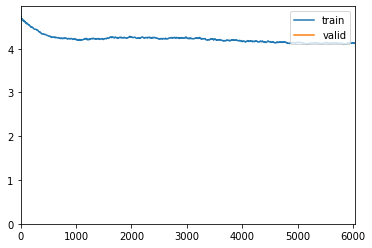

In [21]:
learner.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
learner.save('Learner_language_model_1')

In [23]:
learner.load('Learner_language_model_1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj given that this movie was put together in less than a year might explain its shortness ( 81 minutes - including end credits , so roughly 76 minutes of actual film ) . xxmaj but what it can not explain is its lack of humor that the previous film possessed . 
 
  xxmaj the gags are quick and sometimes not even funny . xxmaj the only true funny parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene , basically recreated the scene without much humor injected into it . 
 
  xxmaj today 's youth might not be able to relate to the spoof gags of the classic supernatural horror films o

In [0]:
learner.unfreeze()
databunch_languagemodel.batch_size = batchsize//2

epoch,train_loss,valid_loss,accuracy,time
0,4.106805,4.037380,0.304558,1:01:11


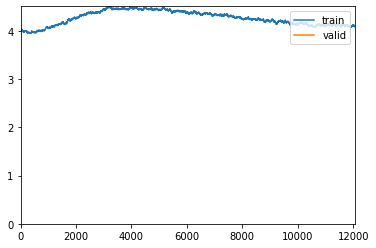

In [25]:
learner.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learner.save('Learner_language_model_2')

In [26]:
learner.load('Learner_language_model_2')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj given that this movie was put together in less than a year might explain its shortness ( 81 minutes - including end credits , so roughly 76 minutes of actual film ) . xxmaj but what it can not explain is its lack of humor that the previous film possessed . 
 
  xxmaj the gags are quick and sometimes not even funny . xxmaj the only true funny parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene , basically recreated the scene without much humor injected into it . 
 
  xxmaj today 's youth might not be able to relate to the spoof gags of the classic supernatural horror films o

### สร้างประโยค 40 คำ 2 ประโยค

In [0]:
TEXT = 'This movie is so'
N_WORDS = 40
N_SENTENCES = 2

In [30]:
print('\n'.join(learner.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

This movie is so good i find myself wishing it was n't for Alfred Hitchcock . At first i thought that this movie was a great film , but when i saw it , i was really surprised that it had
This movie is so low - budget in its story . REALLY THIS MOVIE IS GREAT ABOUT IT ! It should have been a " Classic Movie " , but its a Star


In [0]:
TEXT = 'The only complaint about this film is'
N_WORDS = 40
N_SENTENCES = 2

In [41]:
print('\n'.join(learner.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

The only complaint about this film is that it succeeds in all three aspects . First of all , it 's a series of marvel and seriousness . And if you 're in the die - hard Family Movie style , you can
The only complaint about this film is the fact that the main character is such a stupid and have no love interest , was to be the only woman in the whole film . The actors were right there , it was just a pity that


In [0]:
learner.save_encoder('encoder_language_model')

# Classifier

In [0]:
path = untar_data(URLs.IMDB)

In [45]:
databunch_classifier = (TextList.from_folder(path, vocab=databunch_languagemodel.vocab)
                       .split_by_folder(valid='test')
                       .label_from_folder(classes=['neg', 'pos'])
                       .databunch(bs=batchsize))

databunch_classifier.save('databunch_classifier.pkl')

In [0]:
databunch_classifier = load_data(path, 'databunch_classifier.pkl', bs=batchsize)

In [48]:
databunch_classifier.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj the premise of this movie has been tickling my imagination for quite some time now . xxmaj we 've all heard or read about it in some kind of con - text . xxmaj what would you do if you were all alone in the world ? xxmaj what would you do if the entire world suddenly disappeared in front of your eyes ? xxmaj in fact ,",pos
"xxbos xxmaj by 1987 xxmaj hong xxmaj kong had given the world such films as xxmaj sammo xxmaj hung 's ` xxmaj encounters of the xxmaj spooky xxmaj kind ' xxmaj chow xxmaj yun xxmaj fat in xxmaj john xxmaj woo 's iconic ` a xxmaj better xxmaj tomorrow ' , ` xxmaj zu xxmaj warriors ' and the classic ` xxmaj mr xxmaj vampire ' . xxmaj jackie xxmaj",pos
xxbos xxmaj it has said that xxmaj the xxmaj movies and xxmaj baseball both thrived during xxmaj the xxmaj great xxmaj depression . xxmaj it appears that the grim realities of a xxmaj nation caught up in the aftermath of this xxmaj economic xxmaj disaster created a need for occasional relief for the populace . a temporary escape could be found in the on going soap opera that is xxmaj,pos
"xxbos xxup spoilers xxup herein \n \n xxmaj my xxmaj high xxmaj school did all they could to try and motivate us for exams . xxmaj but the most memorable method they used to get us into the right state of mind was a guest speaker , who was none other than xxmaj australian xxmaj kickboxing 's favorite son , xxmaj stan "" xxmaj the xxmaj man "" xxmaj",neg


# Train Classifier

In [0]:
learner = text_classifier_learner(databunch_classifier,
                                 AWD_LSTM, drop_mult=0.5,
                                 callback_fns=ShowGraph).to_fp16()

learner.save_encoder('encode_language_model')

epoch,train_loss,valid_loss,accuracy,time
0,0.694256,0.682501,0.516880,03:40


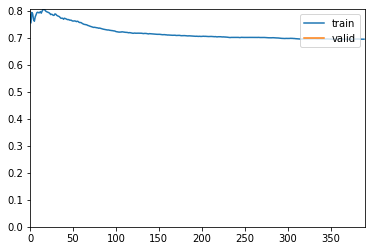

In [53]:
learner.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
learner.save('text_classifier_1')

In [55]:
learner.load('text_classifier_1')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj given that this movie was put together in less than a year might explain its shortness ( 81 minutes - including end credits , so roughly 76 minutes of actual film ) . xxmaj but what it can not explain is its lack of humor that the previous film possessed . 
 
  xxmaj the gags are quick and sometimes not even funny . xxmaj the only true funny parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene , basically recreated the scene without much humor injected into it . 
 
  xxmaj today 's youth might not be able to relate to the spoof gags of the classic supernatural horror films of the

In [0]:
learner.freeze_to(-2)
databunch_classifier.batch_size=batchsize//2

epoch,train_loss,valid_loss,accuracy,time
0,0.678780,0.695128,0.539280,05:15


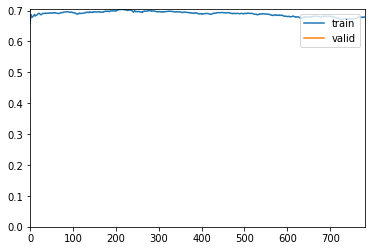

In [57]:
lrs = slice(1e-2/(2.6**4), 1e-2)
learner.fit_one_cycle(1, lrs, moms=(0.8,0.7))

In [0]:
learner.save('text_classifier_2')

In [59]:
learner.load('text_classifier_2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj given that this movie was put together in less than a year might explain its shortness ( 81 minutes - including end credits , so roughly 76 minutes of actual film ) . xxmaj but what it can not explain is its lack of humor that the previous film possessed . 
 
  xxmaj the gags are quick and sometimes not even funny . xxmaj the only true funny parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene , basically recreated the scene without much humor injected into it . 
 
  xxmaj today 's youth might not be able to relate to the spoof gags of the classic supernatural horror films of the

In [0]:
learner.freeze_to(-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.612033,0.579788,0.711520,07:18


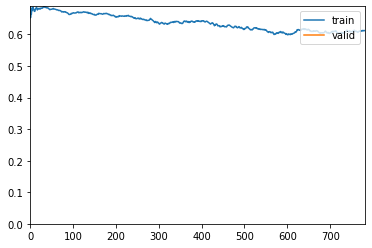

In [65]:
learner.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learner.save('text_classifier_3')

In [69]:
learner.load('text_classifier_3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj given that this movie was put together in less than a year might explain its shortness ( 81 minutes - including end credits , so roughly 76 minutes of actual film ) . xxmaj but what it can not explain is its lack of humor that the previous film possessed . 
 
  xxmaj the gags are quick and sometimes not even funny . xxmaj the only true funny parts are the quick spoofs on the xxmaj nike basketball spots , xxmaj james xxmaj woods ' portrayal of xxmaj max xxmaj van xxmaj sydow 's character in the xxmaj exorcist , and bits and pieces scattered throughout the film . xxmaj very unfunny was the take off of xxmaj charlie 's xxmaj angels , which like the first xxmaj scary xxmaj movie and the xxmaj matrix spin off scene , basically recreated the scene without much humor injected into it . 
 
  xxmaj today 's youth might not be able to relate to the spoof gags of the classic supernatural horror films of the

In [0]:
learner.unfreeze()
# learner.unfreeze()

In [0]:
learner.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
learner.save('text_classifier_4')

In [0]:
learner.load('text_classifier_4')

# ดูผลลัพธ์

In [72]:
learner.predict("A movie which is so beautifully portrayed and is so hopeful that it won't let you take your eyes off it.")

(Category pos, tensor(1), tensor([0.3986, 0.6014]))

In [73]:
learner.predict("This movie is a complete mess. Everything about this movie sucks.")

(Category neg, tensor(0), tensor([0.5407, 0.4593]))